**Tema 1 - P1. Enunciado**
------------------------------------------------------------------------------
***

Se considera la siguiente estructura de barras articuladas:

<img src="nudos1.png" width="600">

Se pide:
- Calcular las reacciones en los apoyos y los esfuerzos en las barras utilizando el método de los nudos, expresandolos en función de la carga $P$.
- Realizar la comprobación utilizando el equilibrio en el nudo B.
- Calcular los valores numéricos de los esfuerzos del apartado anterior considerando $P=100 N$.
- Realizar una representación gráfica de la solución utilizando escalas de colores para mostrar la magnitud  y el  signo (tracción/compresión) de los esfuerzos.




**Resolución:**
------------------------------------------------------------------------------


**Inicialización**

Lo primero que debemos hacer es cargar las librerías necesarias de Python. Para este problema, en particular, será de gran utilidad la librería *sympy* que permite realizar cálculo simbólico (como haríamos con Máxima, Maple o Mathemática).

In [1]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

Y después definiremos las variables simbólicas necesarias (las incógnitas del problema: reacciones en los apoyos y esfuerzos en las barras). También daremos valor a otras variables requeridas en el problema, en este caso el ángulo entre barras.

In [2]:
Rax,Ray,Rby=symbols('Rax Ray Rby') #variables simbólicas: reacciones en apoyos
Nac,Nae,Ncd,Nce,Ned,Nbd,Nbe=symbols('Nac Nae Ncd Nce Ned Nbd Nbe') #variables simbólicas: esfuerzos axiales de tracción en las barras
P,L=symbols('P L')

a=60/360*2*math.pi #Python trabaja en radianes por defecto, es necesario pasar el angulo 60º a radianes

**Cálculo de las reacciones**

Para calcular las reacciones aplicaremos las ecuaciones de equilibrio estático global. Formularemos un sistema de 3 ecuaciones $ΣFx=0$, $ΣFy=0$ y $ΣMz=0 $ con 3 incógnitas, $R_{A,x}$, $R_{A,y}$ y $R_{B,y}$ y lo resolveremos utilizando la función *linsolve*.

In [3]:
#-------------------------------------#
#          Equilibrio global
#-------------------------------------#
#Se utiliza la funcion "linsolve" que resuelve un sistema de ecuaciones.
#Añadir las ecuaciones ΣFx=0, ΣFy=0 y ΣMz=0 en la primera, segunda y tercera linea. 
#Nota: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.
sol,=linsolve([ 
                -P/2+Rax+P/2,  #Es la eq.: ΣFx=0  ->  -P/2+Rax+P/2=0
                 Ray+Rby-2*P,
                -P*L-P*(L+L*cos(a))+Rby*2*L
             ], 
                (Rax,Ray,Rby)  #Es la lista de incógnitas a resolver
            ) 
#print (sol)  #La solución está contenida en el vector "sol"

Rax=sol[0] 
Ray=sol[1] 
Rby=sol[2] 

print("-- Equilibrio Global --")
print(" ")
print("Las expresiones simbólicas de las reacciones en A y B son:")
print("Rax=", Rax)
print("Ray=", Ray)
print("Rby=", Rby)

-- Equilibrio Global --
 
Las expresiones simbólicas de las reacciones en A y B son:
Rax= 0
Ray= 0.75*P
Rby= 1.25*P


**Cálculo de los esfuerzos en las barras (método de los nudos)**

Para calcular los esfuerzos en las barras aplicaremos las ecuaciones de equilibrio estático en los nudos. Formularemos un sistema de 2 ecuaciones $ΣFx=0$ y $ΣFy=0$ con 2 incógnitas (2 esfuerzos axiales) y lo resolveremos utilizando la función *linsolve*.

Empezaremos por el nudo A y seguiremos con los nudos C, D y E:

**Nudo A**

<img src="n1.png" width="200">


In [4]:
#-------------------------------------#
#         Método de los nudos
#-------------------------------------#
#Iremos aplicando el equilibrio estático (ΣFx=0 y ΣFy=0) a todos los nudos, en orden.

print("-- Método de los nudos --")


# Nudo A:
#Se utiliza la funcion "linsolve" que resuelve un sistema de ecuaciones.
sol,=linsolve([ 
                -P/2+Nae+Nac*cos(a),  #Es la eq.: ΣFx=0  
                Ray+Nac*sin(a) #Es la eq.: ΣFy=0 
             ], 
                (Nac,Nae)  #Es la lista de incógnitas a resolver
            ) 
Nac=sol[0]  
Nae=sol[1] 

print(" ")
print("Los esfuerzos axiales obtenidos en el nudo A son:")
print("Nac=", Nac)
print("Nae=", Nae)

-- Método de los nudos --
 
Los esfuerzos axiales obtenidos en el nudo A son:
Nac= -0.866025403784439*P
Nae= 0.93301270189222*P


**Nudo C**

<img src="n2.png" width="200">


In [5]:
# Nudo C:
#Se utiliza la funcion "linsolve" que resuelve un sistema de ecuaciones.
sol,=linsolve([ 
                -Nac*cos(a)+Nce*cos(a)+Ncd,  #Es la eq.: ΣFx=0  
                -Nac*sin(a)-Nce*sin(a) #Es la eq.: ΣFy=0 
             ], 
                (Nce,Ncd)  #Es la lista de incógnitas a resolver
            ) 
Nce=sol[0] 
Ncd=sol[1] 

print(" ")
print("Los esfuerzos axiales obtenidos en el nudo C son:")
print("Nce=", Nce)
print("Ncd=", Ncd)

 
Los esfuerzos axiales obtenidos en el nudo C son:
Nce= 0.866025403784439*P
Ncd= -0.866025403784439*P


**Nudo D**

<img src="n3.png" width="200">


In [6]:
# Nudo D:
#Se utiliza la funcion "linsolve" que resuelve un sistema de ecuaciones.
sol,=linsolve([ 
                -Ncd-Ned*cos(a)+Nbd*cos(a),  #Es la eq.: ΣFx=0  
                -Ned*sin(a)-Nbd*sin(a)-P #Es la eq.: ΣFy=0 
             ], 
                (Nbd,Ned)  #Es la lista de incógnitas a resolver
            ) 
Nbd=sol[0] 
Ned=sol[1] 

print(" ")
print("Los esfuerzos axiales obtenidos en el nudo D son:")
print("Nbd=", Nbd)
print("Ned=", Ned)

 
Los esfuerzos axiales obtenidos en el nudo D son:
Nbd= -1.44337567297406*P
Ned= 0.288675134594813*P


**Nudo E**

<img src="n4.png" width="200">

In [7]:
# Nudo E:
#Se utiliza la funcion "linsolve" que resuelve un sistema de ecuaciones.
sol,=linsolve([ 
                Nbe+Ned*cos(a)-Nce*cos(a)-Nae,  #Es la eq.: ΣFx=0  
             ], 
                (Nbe)  #Es la lista de incógnitas a resolver
            ) 
Nbe=sol[0]  

print(" ")
print("Los esfuerzos axiales obtenidos en el nudo E son:")
print("Nbe=", Nbe)

 
Los esfuerzos axiales obtenidos en el nudo E son:
Nbe= 1.22168783648703*P


**Comprobación de la solución**

Para comprobar la solución aplicaremos las ecuaciones de equilibrio estático en el nudo restante, B, y examinaremos si se cumple $ΣFx=0$ y $ΣFy=0$. 


In [8]:
# Comprobación (Nudo B):

res_x=-Nbe+P/2-Nbd*cos(a)
res_y=Rby+Nbd*sin(a)

print("Comprobación (Nudo B): ")
print("ΣFx=", res_x) #Es virtualmente cero, está próximo a la precisión de máquina (1.0e-16)
print("ΣFy=", res_y)
print("Se cumplen las ecuaciones, ¡la solución es correcta! ")

Comprobación (Nudo B): 
ΣFx= -1.11022302462516e-16*P
ΣFy= 0
Se cumplen las ecuaciones, ¡la solución es correcta! 


**Cálculo con valores numéricos**

Ahora sustituiremos en las expresiones de los esfuerzos el valor $P=100 N$. Para ello, usaremos simplemente la función *subs*. 

In [9]:
#-------------------------------------#
#         Valores numéricos
#-------------------------------------#

#Ahora vamos a sustituir P por un valor numérico y calcularemos todos los esfuerzos en las barras

#Asignamos la carga:
Pval=100 #N

#Sustituimos Pval donde aparezca P en las expresiones de los esfuerzos
Raxv=Rax.subs([(P,Pval)])
Rayv=Ray.subs([(P,Pval)])
Rbyv=Rby.subs([(P,Pval)])
Nac=Nac.subs([(P,Pval)])
Nae=Nae.subs([(P,Pval)])
Nce=Nce.subs([(P,Pval)])
Ncd=Ncd.subs([(P,Pval)])
Nbd=Nbd.subs([(P,Pval)])
Ned=Ned.subs([(P,Pval)])
Nbe=Nbe.subs([(P,Pval)])

print("-- Valores numéricos --")

print(" ")
print("Los valores numéricos de las reacciones considerando P=",Pval,"N son:")
print("Rax=", Raxv, " N")
print("Ray=", Rayv, " N")
print("Rby=", Rbyv, " N")

print(" ")
print("Los valores numéricos de los esfuerzos son:")
print("Nac=", Nac, " N")
print("Nae=", Nae, " N")
print("Nce=", Nce, " N")
print("Ncd=", Ncd, " N")
print("Nbd=", Nbd, " N")
print("Ned=", Ned, " N")
print("Nbe=", Nbe, " N")

-- Valores numéricos --
 
Los valores numéricos de las reacciones considerando P= 100 N son:
Rax= 0  N
Ray= 75.0000000000000  N
Rby= 125.000000000000  N
 
Los valores numéricos de los esfuerzos son:
Nac= -86.6025403784439  N
Nae= 93.3012701892220  N
Nce= 86.6025403784439  N
Ncd= -86.6025403784439  N
Nbd= -144.337567297406  N
Ned= 28.8675134594813  N
Nbe= 122.168783648703  N


**Representación gráfica**

Ahora realizaremos la representación gráfica de la solución utilizando funciones propias de la librería *matplotlib*.

-- Representación gráfica --
 
Barras a tracción en azul y barras a compresión en rojo. La intensidad del color indica la magnitud del esfuerzo.


Text(0, 0.5, 'y (m)')

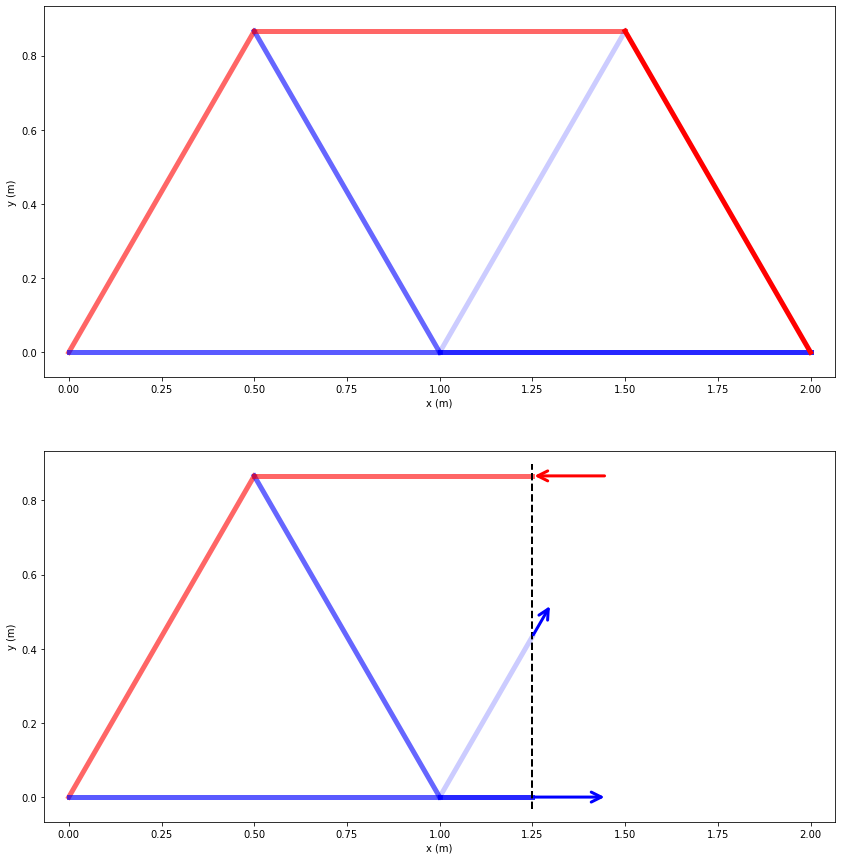

In [10]:
#----------------------------------------#
#         Representación gráfica
#----------------------------------------#

L=1.0 #longitud de las barras
d=L/15.0

#Estas son las coordenadas de los nodos:
Ax=0.0
Ay=0.0
Cx=L/2
Cy=L*sin(a)
Ex=L
Ey=0.0
Bx=2*L
By=0.0
Dx=L+L/2
Dy=Cy

sol=(Nac,Nae,Nce,Ncd,Ned,Nbe,Nbd) #Vector que contiene los esfuerzos axiales
maxval  =max(abs(i) for i in sol) #Valor absoluto máximo de los esfuerzos en las barras
absolute=np.absolute(sol) #Vector de valores absolutos de esfuerzos. La función "absolute" es propia del paquete "np" (NumPy).
sign    =np.sign(sol) #Vector de signos de los esfuerzos (lo usaremos para darle color a las barras). La función "sign" es propia del paquete "np" (NumPy).


f=5.0 #Factor de escala para asignar grosor a las barras en el gráfico.
#wdth =f*absolute/maxval #Para escalar el grosor de las barras según la magnitud del esfuerzo axial
wdth = f*np.ones((7,1))  #Grosor de las barras en la representación gráfica, todas tendrán el valor "f"
alpha=  absolute/maxval  #Esfuerzo en la barra dividido entre el esfuerzo máximo en la estructura

print("-- Representación gráfica --")
print(" ")
print("Barras a tracción en azul y barras a compresión en rojo. La intensidad del color indica la magnitud del esfuerzo.")

filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(2,1,figsize=(15, 15))  #Se define el area del gráfico como un subplot de 2 figuras

ax.set_aspect('equal', adjustable='box') #En la primera figura, llamada "ax", se impone un ratio de aspecto 1:1
ax.set(xlim=(-d, Bx+d), ylim=(-d, float(Cy)+d)) #Se imponen los límites de los ejes

#Cada una de las siguientes lineas pinta cada una de las barras. El color se define como un vector RGBA tal que la barra
#sea roja si está a compresión y sea azul si está a tracción. El parámetro Alpha se calcula con la variable "alpha".
#Nota: la función "float" se usa para convertir una variable a tipo float (número decimal).
ax.plot((Ax,Cx),(Ay,Cy), color=(1.0*((1-float(sign[0]))/2),0.0,1.0*((1+float(sign[0]))/2),float(alpha[0])),linewidth=wdth[0]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Ax,Ex),(Ay,Ey), color=(1.0*((1-float(sign[1]))/2),0.0,1.0*((1+float(sign[1]))/2),float(alpha[1])),linewidth=wdth[1]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Ex,Cx),(Ey,Cy), color=(1.0*((1-float(sign[2]))/2),0.0,1.0*((1+float(sign[2]))/2),float(alpha[2])),linewidth=wdth[2]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Dx,Cx),(Dy,Cy), color=(1.0*((1-float(sign[3]))/2),0.0,1.0*((1+float(sign[3]))/2),float(alpha[3])),linewidth=wdth[3]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Ex,Dx),(Ey,Dy), color=(1.0*((1-float(sign[4]))/2),0.0,1.0*((1+float(sign[4]))/2),float(alpha[4])),linewidth=wdth[4]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Ex,Bx),(Ey,By), color=(1.0*((1-float(sign[5]))/2),0.0,1.0*((1+float(sign[5]))/2),float(alpha[5])),linewidth=wdth[5]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot((Dx,Bx),(Dy,By), color=(1.0*((1-float(sign[6]))/2),0.0,1.0*((1+float(sign[6]))/2),float(alpha[6])),linewidth=wdth[6]) # Se le dice a Python, ¡¡¡pinta f(x)!!!

ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("y (m)") # Nombre y unidades del eje y



#Ahora representaremos la estructura con un corte en x=L+L/4 en la segunda figura "ax2".
#Para ello obtenemos los puntos de corte:
c1x=L+L/4
c1y=0.0
c2x=L+L/4
c2y=L/4*tan(a)
c3x=L+L/4
c3y=Cy

ax2.set_aspect('equal', adjustable='box') #En la segunda figura, llamada "ax2", se impone un ratio de aspecto 1:1
ax2.set(xlim=(-d, Bx+d), ylim=(-d, float(Cy)+d)) #Se imponen los límites de los ejes

#Cada una de las siguientes lineas pinta cada una de las barras. El color se define como un vector RGBA tal que la barra
#sea roja si está a compresión y sea azul si está a tracción. El parámetro Alpha se calcula con la variable "alpha".

ax2.plot((Ax,Cx),(Ay,Cy), color=(1.0*((1-float(sign[0]))/2),0.0,1.0*((1+float(sign[0]))/2),float(alpha[0])),linewidth=wdth[0]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((Ax,Ex),(Ay,Ey), color=(1.0*((1-float(sign[1]))/2),0.0,1.0*((1+float(sign[1]))/2),float(alpha[1])),linewidth=wdth[1]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((Ex,Cx),(Ey,Cy), color=(1.0*((1-float(sign[2]))/2),0.0,1.0*((1+float(sign[2]))/2),float(alpha[2])),linewidth=wdth[2]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((c3x,Cx),(c3y,Cy), color=(1.0*((1-float(sign[3]))/2),0.0,1.0*((1+float(sign[3]))/2),float(alpha[3])),linewidth=wdth[3]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((Ex,c2x),(Ey,c2y), color=(1.0*((1-float(sign[4]))/2),0.0,1.0*((1+float(sign[4]))/2),float(alpha[4])),linewidth=wdth[4]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((Ex,c1x),(Ey,c1y), color=(1.0*((1-float(sign[5]))/2),0.0,1.0*((1+float(sign[5]))/2),float(alpha[5])),linewidth=wdth[5]) # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.plot((c1x,c1x),(-d/2,c3y+d/2), color="black",linewidth=2.0,linestyle='--') #linea de corte

#Variables geométricas auxiliares para representar los vectores
auxx=L+L/4*1.2
auxy=L/4*1.2*tan(a)
aux2x=L+L/4*1.8

#Dibujamos los vectores. Ojo, no se han dibujado a escala. Como ejercicio: modificar las 3 lineas siguientes para que los vectores estén a escala (su tamaño sea acorde a su magnitud numérica)
ax2.annotate("", (auxx, auxy), (c2x, c2y) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'b'})
ax2.annotate("", (c2x, Cy)   , (aux2x, Cy), arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax2.annotate("", (aux2x, 0.0), (c2x, 0.0) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'b'})

ax2.plot(Bx,By, color="black") 

ax2.set_xlabel("x (m)") # Nombre y unidades del eje x
ax2.set_ylabel("y (m)") # Nombre y unidades del eje y

